#Advanced Entity-Relationship Diagram Model

#Multiple Relationships

Multiple relationships occur when two entities are associated with each other through more than one relationship type. This situation often arises in complex systems where entities interact with each other in various ways.


#Weak and Virtual Entities

A weak entity is an entity that cannot be uniquely identified by its attributes alone and depends on another entity called the identifying or owner entity. Weak entities typically have a partial key that, in combination with the owner entity's primary key, forms a composite key. Virtual entities, on the other hand, represent concepts or relationships that are derived from existing entities but are not explicitly stored in the database.



#Class Hierarchies

Class hierarchies represent inheritance relationships between entities, where subclasses inherit attributes and relationships from superclasses. This concept is common in object-oriented programming and can be modeled in the ERD using generalization and specialization relationships.

#Overlap and Coupling

Overlap and coupling refer to the degree of intersection and interdependence between entities in the ERD. Overlap occurs when entities share common attributes or relationships, while coupling measures the strength of connections between entities. Minimizing overlap and coupling helps maintain the integrity and flexibility of the database schema.

In [ ]:
# Example: Advanced Library Management System

# Import necessary libraries
import sqlite3

# Connect to an in-memory database
conn = sqlite3.connect(':memory:')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Define tables for books, users, and borrowings
cursor.execute('''CREATE TABLE IF NOT EXISTS books
                  (book_id INTEGER PRIMARY KEY, title TEXT, author TEXT)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS users
                  (user_id INTEGER PRIMARY KEY, name TEXT, email TEXT)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS borrowings
                  (borrow_id INTEGER PRIMARY KEY, user_id INTEGER, book_id INTEGER,
                  FOREIGN KEY(user_id) REFERENCES users(user_id),
                  FOREIGN KEY(book_id) REFERENCES books(book_id))''')

# Define weak entity for book copies and virtual entity for book categories
cursor.execute('''CREATE TABLE IF NOT EXISTS book_copies
                  (copy_id INTEGER PRIMARY KEY, book_id INTEGER,
                  FOREIGN KEY(book_id) REFERENCES books(book_id))''')

cursor.execute('''CREATE TABLE IF NOT EXISTS book_categories
                  (category_id INTEGER PRIMARY KEY, category_name TEXT)''')

# Define class hierarchy for books and e-books
cursor.execute('''CREATE TABLE IF NOT EXISTS ebooks
                  (ebook_id INTEGER PRIMARY KEY, book_id INTEGER,
                  FOREIGN KEY(book_id) REFERENCES books(book_id))''')

# Define overlap and coupling for reference materials
cursor.execute('''CREATE TABLE IF NOT EXISTS reference_materials
                  (reference_id INTEGER PRIMARY KEY, title TEXT, topic TEXT)''')

# Insert sample data into books, users, and book categories
cursor.executemany("INSERT INTO books (title, author) VALUES (?, ?)",
                   [('The Great Gatsby', 'F. Scott Fitzgerald'),
                    ('To Kill a Mockingbird', 'Harper Lee'),
                    ('1984', 'George Orwell')])

cursor.executemany("INSERT INTO users (name, email) VALUES (?, ?)",
                   [('Alice Smith', 'alice@example.com'),
                    ('Bob Johnson', 'bob@example.com')])

cursor.executemany("INSERT INTO book_categories (category_name) VALUES (?)",
                   [('Fiction',), ('Non-Fiction',), ('Science Fiction',)])

# Insert sample borrowings data
cursor.executemany("INSERT INTO borrowings (user_id, book_id) VALUES (?, ?)",
                   [(1, 1), (1, 2), (2, 3)])

# Insert sample data for book copies
cursor.executemany("INSERT INTO book_copies (book_id) VALUES (?)",
                   [(1,), (1,), (2,), (3,), (3,)])

# Insert sample data for e-books
cursor.executemany("INSERT INTO ebooks (book_id) VALUES (?)",
                   [(2,), (3,)])

# Insert sample data for reference materials
cursor.executemany("INSERT INTO reference_materials (title, topic) VALUES (?, ?)",
                   [('Encyclopedia Britannica', 'Reference'),
                    ('The Oxford Dictionary', 'Language')])


# Commit the transaction
conn.commit()

# Define the SELECT queries
queries = [
    "SELECT * FROM books",
    "SELECT * FROM users",
    "SELECT * FROM borrowings",
    "SELECT * FROM book_copies",
    "SELECT * FROM book_categories",
    "SELECT * FROM ebooks",
    "SELECT * FROM reference_materials"
]

# Execute the queries and display the results
for query in queries:
    cursor.execute(query)
    print(f"Results for query: {query}")
    print(cursor.fetchall())
    print("\n")

# Close the cursor and connection
cursor.close()
conn.close()

Results for query: SELECT * FROM books
[(1, 'The Great Gatsby', 'F. Scott Fitzgerald'), (2, 'To Kill a Mockingbird', 'Harper Lee'), (3, '1984', 'George Orwell')]


Results for query: SELECT * FROM users
[(1, 'Alice Smith', 'alice@example.com'), (2, 'Bob Johnson', 'bob@example.com')]


Results for query: SELECT * FROM borrowings
[(1, 1, 1), (2, 1, 2), (3, 2, 3)]


Results for query: SELECT * FROM book_copies
[(1, 1), (2, 1), (3, 2), (4, 3), (5, 3)]


Results for query: SELECT * FROM book_categories
[(1, 'Fiction'), (2, 'Non-Fiction'), (3, 'Science Fiction')]


Results for query: SELECT * FROM ebooks
[(1, 2), (2, 3)]


Results for query: SELECT * FROM reference_materials
[(1, 'Encyclopedia Britannica', 'Reference'), (2, 'The Oxford Dictionary', 'Language')]




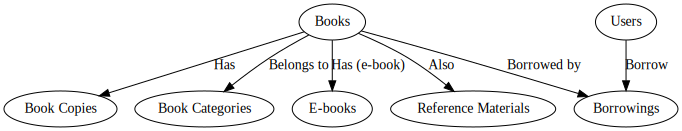

In [ ]:
# Install the required libraries
!pip install graphviz

# Import necessary libraries
from graphviz import Digraph

# Create a new graph
graph = Digraph()

# Define nodes for books, users, borrowings, book copies, book categories, e-books, and reference materials
graph.node('books', label='Books')
graph.node('users', label='Users')
graph.node('borrowings', label='Borrowings')
graph.node('book_copies', label='Book Copies')
graph.node('book_categories', label='Book Categories')
graph.node('ebooks', label='E-books')
graph.node('reference_materials', label='Reference Materials')

# Define relationships between entities
graph.edge('users', 'borrowings', label='Borrow')
graph.edge('books', 'borrowings', label='Borrowed by')
graph.edge('books', 'book_copies', label='Has')
graph.edge('books', 'ebooks', label='Has (e-book)')
graph.edge('books', 'reference_materials', label='Also')
graph.edge('books', 'book_categories', label='Belongs to')

# Render and display the graph
graph.render('library_erd', format='png', cleanup=True)
graph